In [1]:
from datetime import datetime, timedelta
from os import listdir
from os.path import isfile, join, isdir
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def processing_total_BS_num_df(total_bs_num_df):
    total_bs_num_df['Dates'] = pd.to_datetime(total_bs_num_df['Dates'], format= '%Y%m%d')          #converting the string to datetime format
    total_bs_num_df = total_bs_num_df.drop_duplicates(keep='first')                                #In case the num station file has multiple repeated rows. This can emerge if u delete a few pre-processed files (without deleting the corresponding rows in the NUM_STATIONS file) and then run the pre-processing code
    total_bs_num_df = total_bs_num_df.sort_values('Dates')
    
    return total_bs_num_df

In [3]:
def BS_per_OPR_time_series(all_df, total_bs_num_main_opr, total_bs_num_ORANGE, total_bs_num_SFR, total_bs_num_BT, total_bs_num_FREE):
    total_bs_num_main_opr.append(all_df['BS_ID'].nunique())
    num_bs_per_opr = all_df[['BS_ID', 'OPR_NAME']].drop_duplicates(keep='first')['OPR_NAME'].value_counts()
    total_bs_num_SFR.append(num_bs_per_opr['SFR'])
    total_bs_num_ORANGE.append(num_bs_per_opr['ORANGE'])
    total_bs_num_BT.append(num_bs_per_opr['BOUYGUES TELECOM'])
    total_bs_num_FREE.append(num_bs_per_opr['FREE MOBILE'])
    return

In [4]:
def BS_per_TECH_time_series(all_df, total_bs_num_2G, total_bs_num_3G, total_bs_num_4G, total_bs_num_5G, total_bs_num_2G_3G, total_bs_num_2G_3G_4G, total_bs_num_2G_3G_4G_5G, total_bs_num_3G_4G, total_bs_num_3G_4G_5G, total_bs_num_4G_5G,total_bs_num_2G_4G, total_bs_num_2G_5G, total_bs_num_2G_4G_5G, total_bs_num_2G_3G_5G, total_bs_num_3G_5G):
    temp_df = all_df[['BS_ID', 'System']].drop_duplicates(keep='first')
    temp_df['System'] = temp_df['System'].str.split(' ').str[0]
    temp_df = temp_df.drop_duplicates(keep='first')
    groups = temp_df.groupby('BS_ID')['System'].apply(list)

    c_2G = 0            #C stands for counter
    c_3G = 0
    c_4G = 0
    c_5G = 0
    c_2G_3G = 0
    c_2G_3G_4G = 0
    c_2G_3G_4G_5G = 0
    c_3G_4G = 0
    c_3G_4G_5G = 0
    c_4G_5G = 0
    
    c_2G_4G = 0
    c_2G_5G = 0
    c_2G_4G_5G = 0
    c_2G_3G_5G = 0
    c_3G_5G = 0
    
    for systems in groups:
        if set(systems) == set(['GSM']):
            c_2G += 1
        elif set(systems) == set(['UMTS']):
            c_3G += 1
        elif set(systems) == set(['LTE']):
            c_4G += 1
        elif set(systems) == set(['5G']):
            c_5G += 1
        elif set(systems) == set(['GSM', 'UMTS']):
            c_2G_3G += 1
        elif set(systems) == set(['GSM', 'UMTS', 'LTE']):
            c_2G_3G_4G += 1
        elif set(systems) == set(['GSM', 'UMTS', 'LTE', '5G']):
            c_2G_3G_4G_5G += 1
        elif set(systems) == set(['UMTS', 'LTE']):
            c_3G_4G += 1
        elif set(systems) == set(['UMTS', 'LTE', '5G']):
            c_3G_4G_5G += 1
        elif set(systems) == set(['LTE', '5G']):
            c_4G_5G += 1
        elif set(systems) == set(['GSM', 'LTE']):
            c_2G_4G += 1
        elif set(systems) == set(['GSM', '5G']):
            c_2G_5G += 1
        elif set(systems) == set(['GSM', 'LTE', '5G']):
            c_2G_4G_5G += 1
        elif set(systems) == set(['GSM', 'UMTS', '5G']):
            c_2G_3G_5G += 1
        elif set(systems) == set(['UMTS', '5G']):
            c_3G_5G += 1

    total_bs_num_2G.append(c_2G)
    total_bs_num_3G.append(c_3G)
    total_bs_num_4G.append(c_4G)
    total_bs_num_5G.append(c_5G)
    total_bs_num_2G_3G.append(c_2G_3G)
    total_bs_num_2G_3G_4G.append(c_2G_3G_4G)
    total_bs_num_2G_3G_4G_5G.append(c_2G_3G_4G_5G)
    total_bs_num_3G_4G.append(c_3G_4G)
    total_bs_num_3G_4G_5G.append(c_3G_4G_5G)
    total_bs_num_4G_5G.append(c_4G_5G)
    total_bs_num_2G_4G.append(c_2G_4G)
    total_bs_num_2G_5G.append(c_2G_5G)
    total_bs_num_2G_4G_5G.append(c_2G_4G_5G)
    total_bs_num_2G_3G_5G.append(c_2G_3G_5G)
    total_bs_num_3G_5G.append(c_3G_5G)
    return

In [5]:
def TRX_per_TECH_time_series(all_df, total_trx_num, trx_num_2G, trx_num_3G, trx_num_4G, trx_num_5G):
    temp_df = all_df[['TRX_ID', 'System']].drop_duplicates(keep='first')      #Drop actually does nothing here as there are no duplicates but for some reason it stops the warning which would otherwise have come after the next line of code
    total_trx_num.append(temp_df['TRX_ID'].nunique())       #We can also just take the len as the number of lines in the df is equal to the number of transceivers

    temp_df['System'] = temp_df['System'].str.split(' ').str[0]
    groups = temp_df.groupby('System')['TRX_ID'].count()

    trx_num_2G.append(groups['GSM'])
    trx_num_3G.append(groups['UMTS'])
    trx_num_4G.append(groups['LTE'])

    if ('5G' in groups.keys()):
        trx_num_5G.append(groups['5G'])
    else:
        trx_num_5G.append(0)
    return

In [22]:
def plot_TRX_per_TECH_time_series(dates, total_trx_num, trx_num_2G, trx_num_3G, trx_num_4G, trx_num_5G):
    plt.plot(dates, total_trx_num, color='purple', label='All Generations', linewidth=5)

    ger_dates = [datetime(2017, 1, 1), datetime(2018, 1, 1), datetime(2019, 1, 1), datetime(2020, 1, 1), datetime(2021, 1, 1), datetime(2022, 1, 1), datetime(2023, 1, 1), datetime(2024, 1, 1)]
    ger_total_trx_num = [1055856, 1089840, 1143570, 1347324, 1455110, 1571519, 1697240, 1833019]
    plt.plot(ger_dates, ger_total_trx_num, color='purple', label='All Generations', linewidth=5)

    plt.plot(dates, trx_num_2G, color='green', label='2G', linewidth=5)

    plt.plot(dates, trx_num_3G, color='orange', label='3G', linewidth=5)

    plt.plot(dates, trx_num_4G, color='red', label='4G', linewidth=5)

    plt.plot(dates, trx_num_5G, color='blue', label='5G', linewidth=5)
    
    plt.axvline(x = datetime(2020, 12, 1), color = 'b', linestyle='dashed')

    plt.legend(fontsize=21)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)

    plt.ylabel("Number of Transceivers", fontsize=24)

    plt.ylim(ymin = 0)
    # Save Image
    plt.savefig('./Graphs/TRX_by_Technology.pdf')
    # Show graphic
    plt.show()
    
    return

In [7]:
def BS_CGR(dates, total_bs_num_main_opr):
    final_val = total_bs_num_main_opr[len(total_bs_num_main_opr) - 1]
    
    initial_val = total_bs_num_main_opr[0]
    time_months = len(dates) - 1                    #minus 1 because the first date is the starting point
    time_years = time_months / 12
    
    cagr = ((final_val/initial_val)**(1/time_years)) - 1
    print ('BS CAGR:', cagr)
    
    #After 5G
    start_date_5G_index = dates.index(datetime(2020, 10, 30))
    initial_val_5G = total_bs_num_main_opr[start_date_5G_index]
    
    time_months = (len(dates) - start_date_5G_index) - 1                    #minus 1 because the first date is the starting point
    time_years = time_months / 12
    
    cagr_5G = ((final_val/initial_val_5G)**(1/time_years)) - 1
    print ('BS CAGR after 5G:', cagr_5G)
    
    return

In [8]:
def TRX_CGR(dates, total_trx_num):   
    final_val = total_trx_num[len(total_trx_num) - 1]
    
    initial_val = total_trx_num[0]
    time_months = len(dates) - 1                    #minus 1 because the first date is the starting point
    time_years = time_months / 12
    cagr = ((final_val/initial_val)**(1/time_years)) - 1
    print ('TRX CAGR:', cagr)
    
    #After 5G
    final_val = total_trx_num[len(total_trx_num) - 1]                         #Checking
    
    start_date_5G_index = dates.index(datetime(2020, 10, 30))    
    initial_val_5G = total_trx_num[start_date_5G_index]
    
    time_months = ((len(dates)) - start_date_5G_index) - 1                    #minus 1 because the first date is the starting point
    time_years = time_months / 12
    
    cagr_5G = ((final_val/initial_val_5G)**(1/time_years)) - 1
    print ('TRX CAGR after 5G:', cagr_5G)
    
    return

In [9]:
pre_processed_dir = './Pre-processed data'

processed_files = [file for file in listdir(pre_processed_dir) if (isfile(join(pre_processed_dir, file))) and ('trx' in file)]

processed_files.sort()         #Will sort according to the date just in case it is not already sorted

print("------------------------ALL Pre-Processed Files------------------------")
print(processed_files)
print("-----------------------------------------------------------------------")

#-------------------------------------------------------------------------------------------#

total_bs_num_df = pd.read_csv(join(pre_processed_dir, 'NUM_STATIONS.txt'), sep = ';')         #Including those from the other operators
total_bs_num_df = processing_total_BS_num_df(total_bs_num_df)

total_bs_num = total_bs_num_df['Total_NUM_BSs'].tolist()


plt.rcParams["figure.figsize"] = (12,12)

dates = []

total_bs_num_main_opr = []
total_bs_num_SFR = []
total_bs_num_ORANGE = []
total_bs_num_BT = []
total_bs_num_FREE = []

#----Single type BSs only - Determined based on transceivers present on the base station----#
total_bs_num_2G = []
total_bs_num_3G = []
total_bs_num_4G = []
total_bs_num_5G = []
#----BSs running multiple technologies----#
total_bs_num_2G_3G = []
total_bs_num_2G_3G_4G = []
total_bs_num_2G_3G_4G_5G = []
total_bs_num_3G_4G = []
total_bs_num_3G_4G_5G = []
total_bs_num_4G_5G = []

total_bs_num_2G_4G = []
total_bs_num_2G_5G = []
total_bs_num_2G_4G_5G = []
total_bs_num_2G_3G_5G = []
total_bs_num_3G_5G = []

total_trx_num = []
trx_num_2G = []
trx_num_3G = []
trx_num_4G = []
trx_num_5G = []


print("----------------------Generating Time Series Graphs----------------------")
for file in processed_files:
    date = file.split('_trx')[0]
    dates.append(datetime.strptime(date, '%Y%m%d'))

    all_df = pd.read_csv(join(pre_processed_dir, file), sep = ';', dtype=str)

    BS_per_OPR_time_series(all_df, total_bs_num_main_opr, total_bs_num_ORANGE, total_bs_num_SFR, total_bs_num_BT, total_bs_num_FREE)
    BS_per_TECH_time_series(all_df, total_bs_num_2G, total_bs_num_3G, total_bs_num_4G, total_bs_num_5G, total_bs_num_2G_3G, total_bs_num_2G_3G_4G, total_bs_num_2G_3G_4G_5G, total_bs_num_3G_4G, total_bs_num_3G_4G_5G, total_bs_num_4G_5G, total_bs_num_2G_4G, total_bs_num_2G_5G, total_bs_num_2G_4G_5G, total_bs_num_2G_3G_5G, total_bs_num_3G_5G)
    TRX_per_TECH_time_series(all_df, total_trx_num, trx_num_2G, trx_num_3G, trx_num_4G, trx_num_5G)

    print('------------Currently Processing------------')
    print(file)

#-----------------Time Series Graph Showing BSs per Technology-----------------# 
# plot_BS_per_TECH_time_series(dates, total_bs_num_main_opr, total_bs_num_2G, total_bs_num_3G, total_bs_num_4G, total_bs_num_5G, total_bs_num_2G_3G, total_bs_num_2G_3G_4G, total_bs_num_2G_3G_4G_5G, total_bs_num_3G_4G, total_bs_num_3G_4G_5G, total_bs_num_4G_5G, total_bs_num_2G_4G, total_bs_num_2G_5G, total_bs_num_2G_4G_5G, total_bs_num_2G_3G_5G, total_bs_num_3G_5G)
#-----------------Time Series Graph Showing TRX per Technology-----------------# 
plot_TRX_per_TECH_time_series(dates, total_trx_num, trx_num_2G, trx_num_3G, trx_num_4G, trx_num_5G)

print("---------------TRX NUM TOTAL-----------------")
print(total_trx_num)
print("---------------Compound Growth Rate-----------------")
BS_CGR(dates, total_bs_num_main_opr)
TRX_CGR(dates, total_trx_num)

------------------------ALL Pre-Processed Files------------------------
['20160730_trx.txt', '20160827_trx.txt', '20160930_trx.txt', '20161028_trx.txt', '20161126_trx.txt', '20161224_trx.txt', '20170128_trx.txt', '20170225_trx.txt', '20170401_trx.txt', '20170429_trx.txt', '20170531_trx.txt', '20170701_trx.txt', '20170729_trx.txt', '20170831_trx.txt', '20171005_trx.txt', '20171031_trx.txt', '20171130_trx.txt', '20171222_trx.txt', '20180131_trx.txt', '20180228_trx.txt', '20180330_trx.txt', '20180427_trx.txt', '20180531_trx.txt', '20180629_trx.txt', '20180801_trx.txt', '20180831_trx.txt', '20180930_trx.txt', '20181031_trx.txt', '20181130_trx.txt', '20181231_trx.txt', '20190131_trx.txt', '20190228_trx.txt', '20190331_trx.txt', '20190430_trx.txt', '20190529_trx.txt', '20190628_trx.txt', '20190801_trx.txt', '20190830_trx.txt', '20191001_trx.txt', '20191031_trx.txt', '20191129_trx.txt', '20200106_trx.txt', '20200131_trx.txt', '20200305_trx.txt', '20200402_trx.txt', '20200430_trx.txt', '202005

NameError: name 'plot_BS_per_TECH_time_series' is not defined

In [11]:
print(dates)

[datetime.datetime(2016, 7, 30, 0, 0), datetime.datetime(2016, 8, 27, 0, 0), datetime.datetime(2016, 9, 30, 0, 0), datetime.datetime(2016, 10, 28, 0, 0), datetime.datetime(2016, 11, 26, 0, 0), datetime.datetime(2016, 12, 24, 0, 0), datetime.datetime(2017, 1, 28, 0, 0), datetime.datetime(2017, 2, 25, 0, 0), datetime.datetime(2017, 4, 1, 0, 0), datetime.datetime(2017, 4, 29, 0, 0), datetime.datetime(2017, 5, 31, 0, 0), datetime.datetime(2017, 7, 1, 0, 0), datetime.datetime(2017, 7, 29, 0, 0), datetime.datetime(2017, 8, 31, 0, 0), datetime.datetime(2017, 10, 5, 0, 0), datetime.datetime(2017, 10, 31, 0, 0), datetime.datetime(2017, 11, 30, 0, 0), datetime.datetime(2017, 12, 22, 0, 0), datetime.datetime(2018, 1, 31, 0, 0), datetime.datetime(2018, 2, 28, 0, 0), datetime.datetime(2018, 3, 30, 0, 0), datetime.datetime(2018, 4, 27, 0, 0), datetime.datetime(2018, 5, 31, 0, 0), datetime.datetime(2018, 6, 29, 0, 0), datetime.datetime(2018, 8, 1, 0, 0), datetime.datetime(2018, 8, 31, 0, 0), datetime

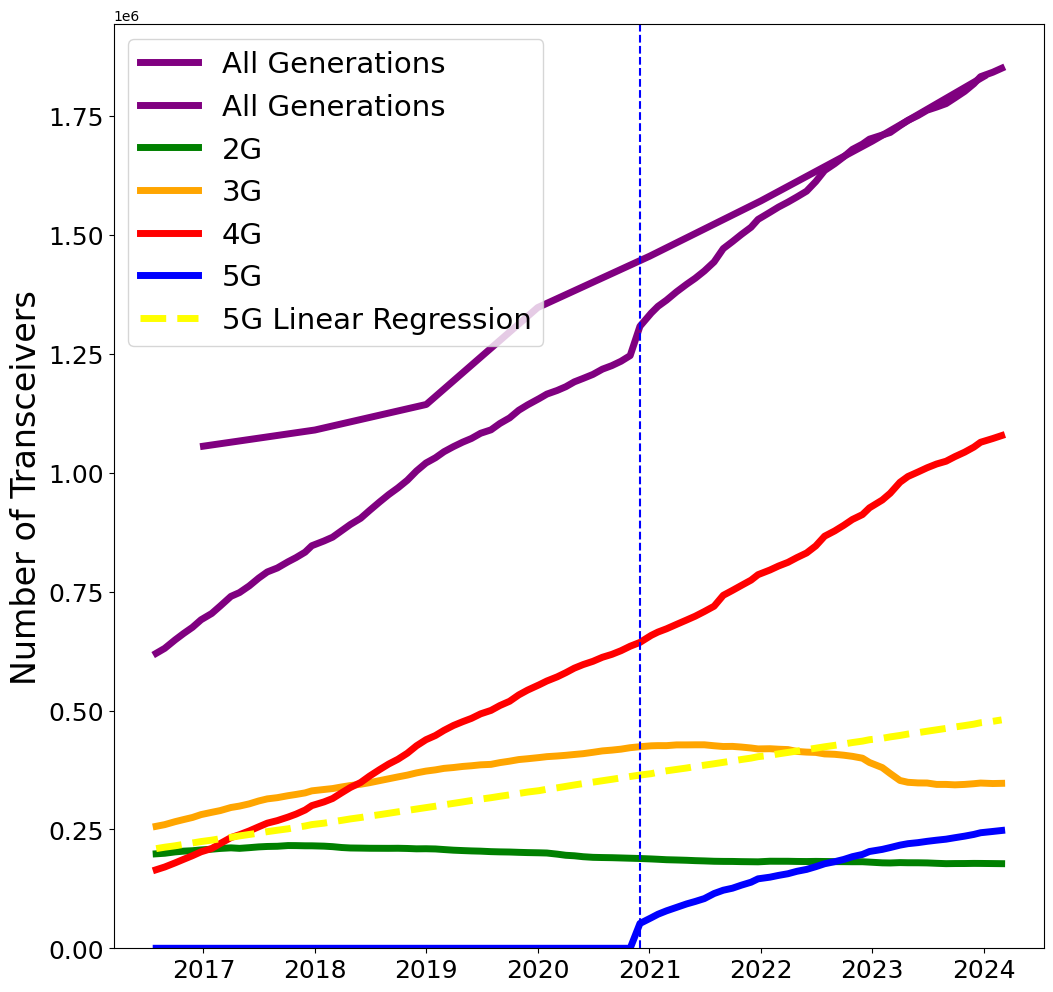

---------------TRX NUM TOTAL-----------------
[620248, 630728, 648494, 662001, 674989, 690773, 704065, 719788, 740020, 747978, 762051, 778476, 791339, 799714, 812730, 821437, 833000, 846507, 856523, 864486, 878246, 891060, 904236, 920564, 938516, 954120, 968071, 984265, 1003763, 1020489, 1031480, 1044164, 1054905, 1064231, 1072051, 1082969, 1090183, 1103529, 1115301, 1131368, 1142699, 1155978, 1165320, 1173069, 1180842, 1191078, 1198378, 1206754, 1217779, 1225248, 1234426, 1246312, 1307973, 1335802, 1349829, 1362845, 1380493, 1396332, 1408850, 1424230, 1443354, 1471296, 1485992, 1500871, 1516181, 1532696, 1547670, 1558636, 1569120, 1579766, 1592087, 1612228, 1635517, 1649784, 1664439, 1679854, 1691026, 1701479, 1710142, 1715518, 1729857, 1740842, 1751169, 1762363, 1768935, 1776137, 1788248, 1801945, 1817891, 1832861, 1842147, 1850500]
---------------Compound Growth Rate-----------------
BS CAGR: 0.07673746438659834
BS CAGR after 5G: 0.06901213394673822
TRX CAGR: 0.15505038630594692
TRX

In [23]:
plot_TRX_per_TECH_time_series(dates, total_trx_num, trx_num_2G, trx_num_3G, trx_num_4G, trx_num_5G)

print("---------------TRX NUM TOTAL-----------------")
print(total_trx_num)
print("---------------Compound Growth Rate-----------------")
BS_CGR(dates, total_bs_num_main_opr)
TRX_CGR(dates, total_trx_num)